In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Creating a custom linear regression class

class CustomLinearRegression:
    def __init__(self, lr: float = 0.01, thr=0.00001, n_epochs=100):
        self.lr = lr
        self.thr = thr
        self.n_epochs = n_epochs
        self.w = np.array([np.random.uniform(-5, 5), np.random.uniform(-5, 5)])

    def cost(self, h, y):
        return np.mean((h - y) ** 2) / 2

    def predict(self, X):
        return self.w @ X.T

    def update_weights(self, X, y):
        m = len(y)
        h = self.predict(X)
        self.w = self.w - self.lr / m * X.T @ (h - y)

    def fit(self, X, y):
        last_cost = 10000000
        for i in range(self.n_epochs):
            self.update_weights(X, y)
            new_cost = self.cost(self.predict(X), y)

            if abs(last_cost - new_cost) < self.thr:
                break

            last_cost = new_cost

In [3]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
np.concatenate((X, y.reshape(-1, 1)), axis=1)

array([[ 3.80759064e-02,  5.06801187e-02,  6.16962065e-02, ...,
         1.99074862e-02, -1.76461252e-02,  1.51000000e+02],
       [-1.88201653e-03, -4.46416365e-02, -5.14740612e-02, ...,
        -6.83315471e-02, -9.22040496e-02,  7.50000000e+01],
       [ 8.52989063e-02,  5.06801187e-02,  4.44512133e-02, ...,
         2.86130929e-03, -2.59303390e-02,  1.41000000e+02],
       ...,
       [ 4.17084449e-02,  5.06801187e-02, -1.59062628e-02, ...,
        -4.68825342e-02,  1.54907302e-02,  1.32000000e+02],
       [-4.54724779e-02, -4.46416365e-02,  3.90621530e-02, ...,
         4.45287288e-02, -2.59303390e-02,  2.20000000e+02],
       [-4.54724779e-02, -4.46416365e-02, -7.30303027e-02, ...,
        -4.22151394e-03,  3.06440941e-03,  5.70000000e+01]])

In [4]:
# Run PCA to reduce the number of features as custom regression class only supports 2 features
from sklearn.decomposition import PCA

X = PCA(n_components=1).fit_transform(X)
X.shape

(442, 1)

In [5]:
# Check sizes and types
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(442, 1)
<class 'numpy.ndarray'>
(442,)
<class 'numpy.ndarray'>


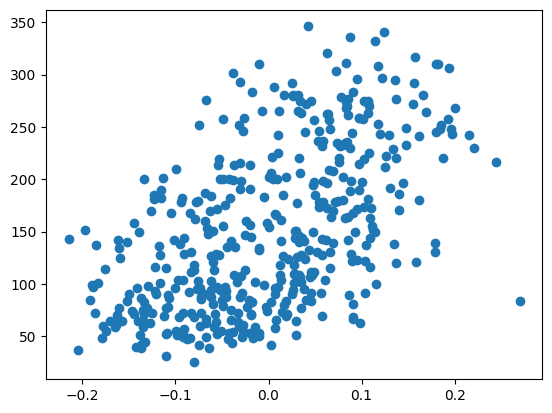

In [6]:
# Visualise the data
plt.scatter(X, y)

Correlation between X and y is not very strong. But we can still try to fit a linear regression model to this data.

In [14]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ones = np.ones((X_train.shape[0], 1))
X_train_for_custom = np.concatenate((ones, X_train), axis=1) # adjust the X matrix
start = time.time() # start measuring execution time
custom_regression = CustomLinearRegression(lr=0.05, thr=0.001, n_epochs=10000)
custom_regression.fit(X_train_for_custom, y_train)
print(X_train_for_custom.shape)
print(type(X_train_for_custom))
print(y_train.shape)
print(type(y_train))
end = time.time()
print("Execution time is the following: ", end - start)
print("MSE:")
mean_squared_error(y_train, custom_regression.predict(X_train_for_custom))

(353, 2)
<class 'numpy.ndarray'>
(353,)
<class 'numpy.ndarray'>
Execution time is the following:  0.10168910026550293
MSE:


4234.740219119344

In [15]:
start = time.time()
sklearn_regression = linear_model.LinearRegression()
sklearn_regression.fit(X_train, y_train)
end = time.time()
print("Execution time is the following: ", end - start)
print("MSE:")
mean_squared_error(y_train, sklearn_regression.predict(X_train))

Execution time is the following:  0.0072498321533203125
MSE:


4232.520358460751

In [17]:
y_pred_custom = custom_regression.predict(np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1))
print(mean_squared_error(y_test, y_pred_custom))
y_pred_custom

3578.079331013293


array([197.37629153, 144.76126595, 187.93065802, 249.21005487,
       174.15552145, 161.16617998, 209.25557874, 220.64328424,
       125.68596204, 155.80965601, 130.19096092, 120.0997637 ,
        70.10515782, 206.18013444, 133.06820609, 123.51188949,
       212.30915201, 226.60996905, 125.4219565 , 199.43442005,
       148.35329236, 138.28532767, 101.80111706, 186.2764984 ,
       128.35231361, 164.56857722, 168.16330887, 167.8026164 ,
        74.54334299, 167.65749977, 167.2947173 , 117.78357354,
       155.94687907, 182.27465558, 187.66760463, 189.39541909,
       154.07358258, 172.54099627, 194.21179336,  96.99185292,
       115.90539057, 139.6562671 , 144.30378916, 192.54991531,
       163.90330713, 104.70954523,  94.556148  ,  93.10934649,
        87.22222244, 131.27578178, 101.26057976,  89.85877395,
       161.01254722, 121.22056234, 214.15419166, 119.224323  ,
       138.29875891, 164.96770438, 115.94049994,  75.12529538,
       198.15438197, 146.11962704, 122.87894861, 146.33

In [18]:
y_pred_sklearn = sklearn_regression.predict(X_test)

In [19]:
mean_squared_error(y_test, y_pred_sklearn)

3581.898152283193

# Conclusion

Overall, the custom linear regression gives a very similar accuracy to the sklearn linear regression and it is a good starting point to understand how linear regression works. 

However, there are some limitations:
- The custom linear regression class is not able to handle multiple features. 
- We used PCA to reduce the number of features to 1 to make it work with the custom linear regression class. But this is not a good practice as we are losing too much information and mean squared error is too high in both cases.

Worth noting, that learning time for both models is very different and it is clear that Scikit-learn models trains much faster.